# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#analysis">Analysis and Visualization</a></li>
</ul>

<a id='intro'></a>
## **Introduction**
<p> We shall be analyzing the WeRateDogs twitter datasets. This dataset contains data (text, pictures, and videos that  are posted on people's twitter accounts.</p>
<p>The aim of this project is to derive key insights from this dataset by performing the entire data wrangling process. We shall walkthrough Data gathering, assessment, cleaning, analysis and finally visually present our insights.</p>

<p1> We shall be following the steps below in choronological order in order to achieve the project goals.</p1>
<l> <dd>1. Data gathering.
    <dd>2. Data assessment.
    <dd>3. Data cleaning.
    <dd>4. Data analysis and visualization.
</l>

<a id='gather'></a>
## **Data Gathering**
In this section, we shall be loading the different datasets into our notebook.You will notice that different techniques will be deployed to achieve this based on the nature of dataset being loaded.

In [1]:
#%pip install tweepy

In [2]:
#importing the relevant libraries to accomplish the tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import requests
import tweepy
import json
from PIL import Image
import os
import re
from timeit import default_timer as timer
import unicodedata
from io import BytesIO

##### 1. Loading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) 

In [3]:
#loading the dataset
tweet_archive = pd.read_csv("twitter_archive_enhanced.csv")
#displaying the first 5 records
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#checking for shape of tweet_archive
tweet_archive.shape

(2356, 17)

We can see that the tweet_archive dataset has data points with 17 attributes

##### 2. Using the Requests lib to download the tweet image prediction (image_predictions.tsv)

In [5]:
#using the requests lib with the relevant url
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
#Writing the response to a file
with open(os.path.join(url.split("/")[-1]), mode="wb") as file_object:
    file_object.write(response.content)

# loading the image prediction dataset
image_pred = pd.read_csv("image-predictions.tsv", sep="\t")
image_pred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [6]:
#checking shape for the image_pred dataset
image_pred.shape

(2075, 12)

We can observe that the image prediction dataset has 2075 data point and 12 features.

##### 3. Using the twitter API to download data

In [7]:
# creating a dataframe with the relevant fields (tweet_id,retweet_count,favorite_count)
tweet_json = pd.DataFrame(columns=["tweet_id", "retweet_count", "favorite_count"])
# reading the tweet_json.txt file to extract tweet info
with open("tweet_json.txt") as file:
    for line in file:
        status = json.loads(line)
        #print(status)
        tweet_id = status["id_str"]
        retweet_count = status["retweet_count"]
        favorite_count = status["favorite_count"]
        tweet_json = pd.concat(
            [
                tweet_json,
                pd.DataFrame.from_records([{"tweet_id": tweet_id,"retweet_count": retweet_count,"favorite_count": favorite_count,}]),
            ],
            sort=False,
        )
tweet_json.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,6970,33698
0,892177421306343426,5272,29225
0,891815181378084864,3464,21978
0,891689557279858688,7191,36793
0,891327558926688256,7718,35185


In [8]:
#resetting the index
tweet_json = tweet_json.reset_index(drop=True)
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6970,33698
1,892177421306343426,5272,29225
2,891815181378084864,3464,21978
3,891689557279858688,7191,36793
4,891327558926688256,7718,35185


In [9]:
#checking the shape of tweet_json dataset 
tweet_json.shape

(2327, 3)

We see that the tweet_json dataset has 2327 observations and 3 attributes

<a id='assess'></a>

## **Assessing Data**
In this section, **eight (8) quality issues and two (2) tidiness issue** have been detected and documented using **both** visual assessment programmatic assessement techniques of assessing the data.

In [10]:
#investigating the datasets for missing values and summary stats and info
#dictionary of the datasets
dataframe_dic = {"tweet_archive":tweet_archive,"image_pred":image_pred, "tweet_json":tweet_json}

#function to check the info about the dataframes
#parameter: dataframe return: dataframe summary info
def dataframe_info(dataframe):
    return dataframe.info()
    
#function to check for null values in a dataframe
#parameter: dataframe return: number of missing values in a dataframe
def dataframe_nulls(dataframe):
    return dataframe.isna().sum()

#function to summary stats of a dataframe
#parameter: dataframe return: summary stats for a dataframe
def dataframe_stats(dataframe):
    return dataframe.describe()

#running the functions
for key,value in dataframe_dic.items():
    #calling the dataframe_info function
    print(f"\nSummary info for {key} dataset:\n")
    display(dataframe_info(value))
    #calling the dataframe_nulls function
    print(f"\nNumber of nulls in {key} dataset:\n")
    display(dataframe_nulls(value)) 


Summary info for tweet_archive dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   obje

None


Number of nulls in tweet_archive dataset:



tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64


Summary info for image_pred dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


None


Number of nulls in image_pred dataset:



tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


Summary info for tweet_json dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   object
 2   favorite_count  2327 non-null   object
dtypes: object(3)
memory usage: 54.7+ KB


None


Number of nulls in tweet_json dataset:



tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

From the results of the dataframe_nulls function, we can see that the tweet_archive dataset has nulls in 6 features unlike the df_image_pred and tweet_json datasets that have all observations filled.
This means that we shall have to handle these missing values at the data cleaning stage.

In [11]:
#taking a look at the summary stats
for key,value in dataframe_dic.items():    
    #calling the dataframe_stats function
    print(f"\n Summary statistics for {key} dataset:\n")
    display(dataframe_stats(value))


 Summary statistics for tweet_archive dataset:



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000



 Summary statistics for image_pred dataset:



,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01



 Summary statistics for tweet_json dataset:



,tweet_id,retweet_count,favorite_count
count,2327,2327,2327
unique,2327,1648,1975
top,673662677122719744,469,0
freq,1,6,160


Checking the tweet_archive dataset for text that has accents. 

In [12]:
# check for accents in the tweet_archive dataframe
def check_accent(df, feature):
    return sum(df.text.str.encode("ascii", errors="ignore") != df.text.str.encode("ascii", errors="replace"))
#calling the check_accent function
check_accent(tweet_archive, "text")

117

We can see that 117 observations in the text feature have accents. 

We shall then proceed to report on the data quality and tidiness issues identified from the assessment exercise. These will be issues addressed in the next stage (data cleaning).

### **Quality issues**

**Visual assessement**
1. The twitter archive dataframe contains null value which are represent both 'NaN' and 'None' in doggo, floofer, pupper, and puppo features.

2. Feature names p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog in the image_pred dataframe are not descriptive.
3. Dog names in features p1 and p2 start with a mixture of upper and lower case in the image_pred dataframe.

**Programmatic assessement**

4. The tweet_id data type is inconsistent in all dataframes. It is integer in the twitter archives and the image predictions dataframes while its of type object in the tweet_json dataframe which calls for standardization.

5. In the tweet_archive dataframe, the 'timestamp' and 'retweeted_status_timestamp' feature data type is object which needs to be changed to timestamp in order to use these two features in our analysis.

6. Features like "in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls" have missing values and such they need to be cleaned. All these features except expanded_urls have more than 90% of the total observations missing. Perhaps this means we discard them.

7. We have accented characters in the tweet_archive dataframe. An example in case is in the text feature. These need to be handled.

8. Looking at the rating_numerator feature in the tweet_archive, a couple of data points appear to be unrealistic with respect to the rating_denominator. With the help of regular expressions, we can see that some numerator values are listed in the text field.

 ### **Tidiness issues**
1. In tweet_archive dataframe doggo, floofer, pupper, puppo features are dog names. Therefore, after sorting out the quality issue associated with these fields, they can be dropped

2. There is an intersection between all dataframes and as such we shall need to merge them after cleaning.

<a id='clean'></a>

## **Data Cleaning**
In this section, **all** issues identified during the assessment phase will be cleaned. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [13]:
# Make copies of original pieces of data
df_tweet_archives = tweet_archive.copy()
df_image_pred = image_pred.copy()
df_tweet_json = tweet_json.copy()

#### Quality Issue 1: NaN values misrepresentation

**Define**
<p>The twitter archive dataframe contains null value which are represent both 'NaN' and 'None' in doggo, floofer, pupper, and puppo features.</p>

**Code**

In [14]:
#replacing None with np.nan
affected_features = ["name", "doggo", "floofer", "pupper", "puppo"]
df_tweet_archives[affected_features] = df_tweet_archives[affected_features].replace("None", np.nan)

<p>We can also note that some dogs are named a, an which are not actual dog names and so we shall have these represented as NaN to make them more representative.</p>

In [15]:
names = ["a", "an"]
for name in names:
    df_tweet_archives["name"] = df_tweet_archives.name.replace(name, np.nan)

**Test**

In [16]:
#df_tweet_archives.name.sample(10)
df_tweet_archives.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1859,675497103322386432,NaN,NaN,2015-12-12 02:07:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reggie. He's going for the world record. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675497103...,11,10,Reggie,NaN,NaN,NaN,NaN
1346,704480331685040129,NaN,NaN,2016-03-01 01:36:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucia. She's a Cumulonimbus Floofmallow. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704480331...,11,10,Lucia,NaN,NaN,NaN,NaN
1863,675372240448454658,NaN,NaN,2015-12-11 17:51:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...","The tail alone is 13/10. Great dog, better own...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675372240...,13,10,NaN,NaN,NaN,NaN,NaN
157,861288531465048066,NaN,NaN,2017-05-07 18:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861288531...,13,10,NaN,NaN,NaN,NaN,NaN
534,807106840509214720,NaN,NaN,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,NaN,NaN,NaN


In [17]:
#testing the name change
df_tweet_archives.query('name in @names')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


We can see that an empty dataframe is returned which confirms that the chnages were effected successfully

#### Quality Issue 2: Non-descriptive feature names

**Define**
<p>Feature names p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog in the image_pred dataframe are not descriptive.</p>

**Code**

In [18]:
#new column names guided by the datasets metadata
names = {
        "p1": "predicted_breed_1","p1_conf": "predicted_breed_1_confidence","p1_dog": "predicted_breed_1_isDog",
        "p2": "predicted_breed_2","p2_conf": "predicted_breed_2_confidence","p2_dog": "predicted_breed_2_isDog",
        "p3": "predicted_breed_3","p3_conf": "predicted_breed_3_confidence","p3_dog": "predicted_breed_3_isDog"}
#renaming the features with more descriptive names
df_image_pred = df_image_pred.rename(columns=names)

**Test**

In [19]:
#checking feature names to confirm the change
df_image_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'predicted_breed_1',
       'predicted_breed_1_confidence', 'predicted_breed_1_isDog',
       'predicted_breed_2', 'predicted_breed_2_confidence',
       'predicted_breed_2_isDog', 'predicted_breed_3',
       'predicted_breed_3_confidence', 'predicted_breed_3_isDog'],
      dtype='object')

More descriptive features names have been successfully captured.

#### Quality Issue 3: Inconsistent casing in dog name

**Define**
<p>Dog names in features p1 and p2 start with a mixture of upper and lower case in the image_pred dataframe.</p>

**Code**

In [20]:
#features of interest
features = ["predicted_breed_1", "predicted_breed_2", "predicted_breed_3"]
for feature in features:
    # removing the name separators 
    df_image_pred[feature] = df_image_pred[feature].str.replace("_", " ")
    # capitalize first letter of the dog name
    df_image_pred[feature] = df_image_pred[feature].apply(lambda x: x.title())

**Test**

In [21]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,predicted_breed_1,predicted_breed_1_confidence,predicted_breed_1_isDog,predicted_breed_2,predicted_breed_2_confidence,predicted_breed_2_isDog,predicted_breed_3,predicted_breed_3_confidence,predicted_breed_3_isDog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


We can now see that the dog names have consistent casing.

#### Quality Issue 4: inconsistent data type for tweet_id across all dataframes 

**Define**
<p> The tweet_id data type is inconsistent in all dataframes. It is integer in the twitter archives and the image predictions dataframes while its of type object in the tweet_json dataframe which calls for standardization.</p>

**Code**

In [22]:
#changine the tweet_id to integer
df_tweet_json.tweet_id = df_tweet_json.tweet_id.astype("int64")

**Test**

In [23]:
df_tweet_archives.tweet_id.dtype == df_image_pred.tweet_id.dtype ==df_tweet_json.tweet_id.dtype

True

We can observe that the data type for tweet_id has been successfully changed to integer and matches in all dataframes

#### Quality Issue 5: wrong data type for datetime columns

**Define**
<p>In the tweet_archive dataframe, the 'timestamp' and 'retweeted_status_timestamp' feature data type is object which needs to be changed to timestamp in order to use these two features in our analysis.</p>

**Code**

In [24]:
#affected features
features = ['timestamp','retweeted_status_timestamp']
for feature in features:
    df_tweet_archives[feature] = df_tweet_archives[feature].astype('datetime64[ns]')

**Test**

In [25]:
df_tweet_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    datetime64[ns]
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

We can see that the data types for features timestamp and retweeted_status_timestamp have been converted to datetime

#### Quality Issue 6: Missing values in df_tweet_archive dataframe

**Define**
<p>Features like "in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls" have missing values and such they need to be cleaned. All these features except expanded_urls have more than 90% of the total observations missing. Perhaps this means we discard them.</p>

**Code**

In [26]:
df_tweet_archives.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           807
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

Since features retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp have more than 90% of observations missing and are irrelevant to our analysis, we can move to drop them.

In [27]:
#dropping these three features
features = ["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
df_tweet_archives = df_tweet_archives.drop(features, axis=1)

**Test**

In [28]:
df_tweet_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2356 non-null   int64         
 1   in_reply_to_status_id  78 non-null     float64       
 2   in_reply_to_user_id    78 non-null     float64       
 3   timestamp              2356 non-null   datetime64[ns]
 4   source                 2356 non-null   object        
 5   text                   2356 non-null   object        
 6   expanded_urls          2297 non-null   object        
 7   rating_numerator       2356 non-null   int64         
 8   rating_denominator     2356 non-null   int64         
 9   name                   1549 non-null   object        
 10  doggo                  97 non-null     object        
 11  floofer                10 non-null     object        
 12  pupper                 257 non-null    object        
 13  pup

We can see that retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp have been dropped. 
We shall ignore the expanded_urls feature as its also not relevant to our analysis.

#### Quality Issue 7: Presence of accents in the df_tweet_archives dataframe

**Define**
<p>We have accented characters in the tweet_archive dataframe. An example in case is in the text feature. These need to be handled.</p>

**Code**

In [29]:
#removing accents
df_tweet_archives.text = df_tweet_archives.text.str.normalize("NFKD").str.encode("ascii", errors="ignore").str.decode("utf-8")

**Test**

In [30]:
#using the check_accent function earlier defined to check for presence of accents
accents = check_accent(df_tweet_archives, "text")
accents

0

We can see that the check_accent method returns 0 as the sum of accents in the text feature. This means that we have successfully removed them.

#### Quality Issue 8: Unrealistic data points

**Define**
<p>Looking at the rating_numerator feature in the tweet_archive, a couple of data points appear to be unrealistic with respect to the rating_denominator. With the help of regular expressions, we can see that some numerator values are listed in the text field.</p>

**Code**

In [31]:
# finding records that have ratings in the text column using regex
rate_in_text = df_tweet_archives[df_tweet_archives.text.str.contains(r"(?:\d+\.\d*\/\d+)")]
# Convert the ratings into a list
rate_in_text = list(rate_in_text.text)
# extract numerators and set denominator to 10
for rate in rate_in_text:
    elements = df_tweet_archives.text == rate
    numerator = "rating_numerator"
    denominator = "rating_denominator"
    df_tweet_archives.loc[elements, numerator] = re.findall(r"\d+\.\d+", rate)
    df_tweet_archives.loc[elements, denominator] = 10

**Test**

In [32]:
# changing the data type from object to float
df_tweet_archives.rating_numerator = df_tweet_archives.rating_numerator.astype('float')
df_tweet_archives[df_tweet_archives.text.str.contains(r"(?:\d+\.\d*\/\d+)")].rating_numerator

45      13.50
340      9.75
695      9.75
763     11.27
1689     9.50
1712    11.26
Name: rating_numerator, dtype: float64

We can see that all the identified data points have been cleaned and converted to floating point values.

### Tideness

#### Tideness Issue 1: Dropping the irrelevant columns in the df_tweet_archives dataframe

**Define**
<p>In tweet_archive dataframe doggo, floofer, pupper, puppo features are dog names. I will move to drop them</p>

**Code**

In [33]:
# #dropping the 4 features
features = ['doggo', 'floofer', 'pupper', 'puppo']
df_tweet_archives.drop(features,axis='columns',inplace=True)

**Test**

In [34]:
df_tweet_archives.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name'],
      dtype='object')

We can notice that the dog name features have been dropped fromt the df_tweet_archives dataframe

#### Tideness Issue 2: Three separate datasets with an intersection

**Define**
<p>There is an intersection between all dataframes and as such we shall need to merge them after cleaning.</p>

**Code**

In [35]:
df_twitter_archive_master = pd.merge(pd.merge(df_image_pred, df_tweet_json, on="tweet_id"), df_tweet_archives, on="tweet_id")

**Test**

In [36]:
df_twitter_archive_master.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'predicted_breed_1',
       'predicted_breed_1_confidence', 'predicted_breed_1_isDog',
       'predicted_breed_2', 'predicted_breed_2_confidence',
       'predicted_breed_2_isDog', 'predicted_breed_3',
       'predicted_breed_3_confidence', 'predicted_breed_3_isDog',
       'retweet_count', 'favorite_count', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'],
      dtype='object')

We now have all three dataframes merged.

<a id='store'></a>

## **Storing Data**
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [37]:
df_twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

<a id='analysis'></a>

## **Analyzing and Visualizing Data**
In this section, we will analyze the data and visualize the results in order to draw insights.

### Research Question 1: What has been the trend of retweets and likes over the years?

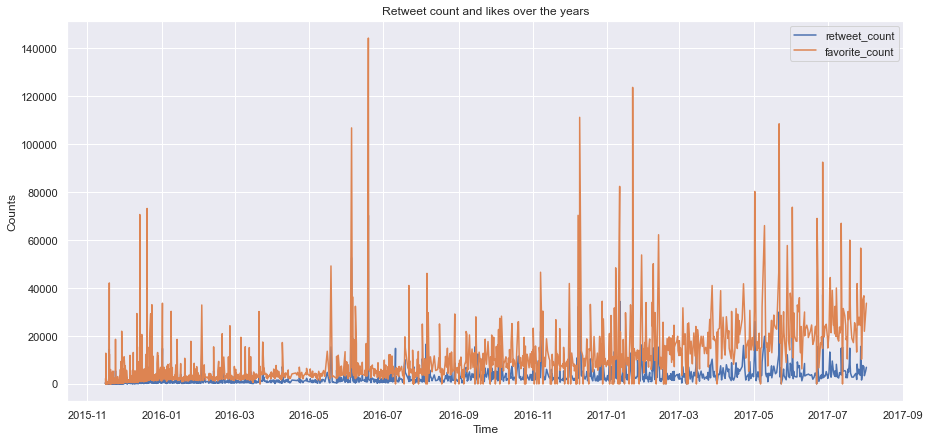

In [38]:
plt.figure(figsize=(15, 7))
ax = plt.plot(df_twitter_archive_master.groupby("timestamp")[["retweet_count", "favorite_count"]].apply(sum))
plt.title("Retweet count and likes over the years")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.legend(df_twitter_archive_master.groupby("timestamp")[["retweet_count", "favorite_count"]].apply(sum))
plt.show()

### Insight:
<p> From the graph, we can see that the WeRateDogs tweets have been liked more than retweets with the 2016-06 having the highest number of likes.</p>

### Research Question 2: What is the distribution of  WeRateDog tweets by day of the week?

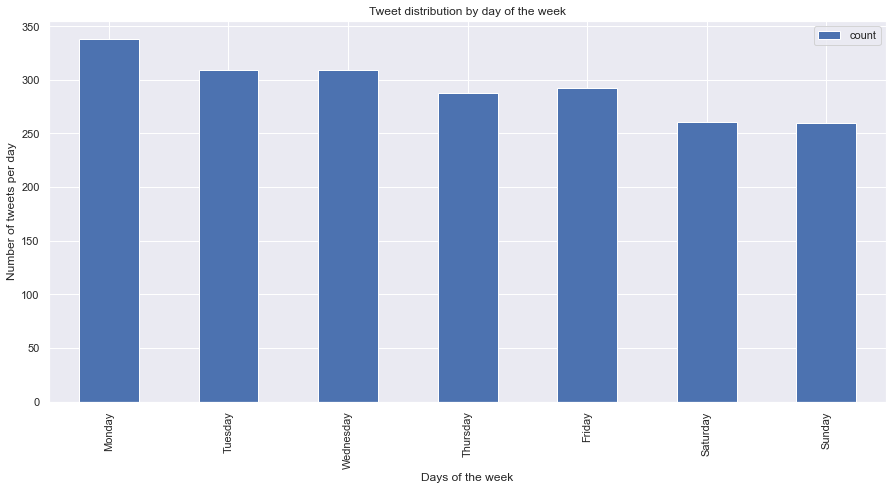

In [39]:
#extracting day from timestamp
df_twitter_archive_master_1 = df_twitter_archive_master.copy()
df_twitter_archive_master_1['day'] = df_twitter_archive_master_1.timestamp.dt.day_name()
#ordered list of week days
orderedDays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#grouping the data
day_groups = df_twitter_archive_master_1.groupby('day').count().reindex(orderedDays)[['tweet_id']]
#renaming tweet_id to reflect counts
name={'tweet_id':'count'}
day_groups = day_groups.rename(columns=name)
#visualizing the results
ax = day_groups.plot(kind='bar',figsize=(15, 7))
plt.title("Tweet distribution by day of the week")
plt.xlabel("Days of the week")
plt.ylabel("Number of tweets per day")
plt.show()


### Insight:
<p> From the graph, we can see that WeRateDogs tweets are more during week days that on weekends with Monday having the highest number of tweets.</p>

### Research Question 3: What is the highest and lowest number of  retweets for WeRateDogs tweets?

In [40]:
# most retweeted tweet
print(f'Highest number of retweets: {df_twitter_archive_master.retweet_count.max()}')
print(f'Percentage of highest number of retweets: {(df_twitter_archive_master.retweet_count.max()/df_twitter_archive_master.retweet_count.sum())*100}%')
#least retweeted tweet
print(f'Least number of retweets: {df_twitter_archive_master.retweet_count.min()}')
print(f'Percentage of highest number of retweets: {(df_twitter_archive_master.retweet_count.min()/df_twitter_archive_master.retweet_count.sum())*100}%')


Highest number of retweets: 70335
Percentage of highest number of retweets: 1.4538960838962225%
Least number of retweets: 11
Percentage of highest number of retweets: 0.00022738120314009307%


### Insight:
<p> We can see that WeRateDogs tweets highest retweets stand at 70335 with the least being 11. The tweet with the highest retweet count accounts for over 1.4539 of all retweets compared to the tweet with the least number of retweets that accounts for 0.00023% <p>